# COMP30760 Data Science in Python Assignment -1
### <font color = dark red>AHMED JOUDA - 18329393</font>

AHMED JOUDA - 18329393
>- The aim of this analysis is to analyze the **COVID-19 API** consisting of each country's statistics around confirmed cases, deaths and recoveries.
>- This will allow us to analyse different waves of the virus, discuss in which months they occured and what features did these waves have in Ireland, Italy and Sweden. Ireland and Italy were chosen as they have had a similar trend with the virus and Sweden was chose because it had no lockdowns imposed.

In [1]:
import json
import requests
import os
import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Task 1a: Data Identification

**<font color= blue>The API Selected: </font>**
>- A single API was chosen for this assignment, the COVID-19 API. It is provided at https://covid19api.com/ 
>-  Using the dataset that returns all cases by case type for a country within a given date range. This is provided at: https://api.covid19api.com/country/NAME-OF-COUNTRY?from=2020-03-01T00:00:00Z&to=2020-04-01T00:00:00Z
>-  The particular API is freely available for anyone to use.
>-  There is no API key required for the extration of data.

# Task 1b: Data Collection through chosen API using Python

**<font color= blue>Collecting raw data: </font>**
>- Using a function called ***get_raw_data***, I am using the API to retrieve COVID-19 data for the country. Country code and dates are passed into the function as arguments.


# Task 1c : Saving the collected data in JSON format

**<font color= blue>Storing raw data: </font>**

Firstly, I extracted data using the function call to the function ***get_raw_data*** and created two JSON files to store the dataset for each country.
>- The first file is to store the data containing the confirmed, active and dead cases in Ireland from February till November. This file is named ***'covid_ireland.json'***
>- The second file is to store the data containing the confirmed, active and dead cases in Italy from February till November. This file is named ***'covid_italy.json'***
>- The third file is to store the data containing the confirmed, active and dead cases in Sweden from February till November. This file is named ***'covid_sweden.json'***
>- After navigating to the required location to store the files in, ***'Data Folder'***, I opened a new file for writing with the required name and used ***'f.write'*** when collecting the response data from the url to write it.


In [2]:
#Collecting the raw data and saving it as JSON files.

#Need to save the files in the Data folder therefore I redirected to it.
os.chdir("C:\\Users\\ahmed\\Desktop\\DS_A1\\Data")

#Basic URL for the api call, more features can be added for filtered data
url_base = "https://api.covid19api.com/country/"

#Function that retrieves the data for specified country in a specified period
def get_raw_data(country, d_from, d_to):
    #first we must fill in the url
    url = url_base + country + "?from=" + d_from + "T00:00:00Z&to=" + d_to + "T00:00:00Z"
    #retrieve data and save file
    response = requests.get(url)
    #Ensuring the API call works, we must check if the response code is 200
    if response.status_code ==200:
        print("Data retrieved with status code: ", response.status_code)
        #Storing the data as a json file with the country name
        with open("covid_"+country+".json", "wb") as f:
            f.write(response.content)
            print("JSON saved!")
    else:
        print("Not able to retrieve data from dataset", response.status_code)

#Specify the countries for which we want the data in a list
countries = ["ireland","italy","sweden"]

#Specify the dates
date_from = "2020-02-01"
date_to = "2020-11-10"

#Loop over the list while calling the function at each iteration with the specified dates
for country in countries:
    get_raw_data(country, date_from, date_to)


Data retrieved with status code:  200
JSON saved!
Data retrieved with status code:  200
JSON saved!
Data retrieved with status code:  200
JSON saved!


# Task 2a: Load the JSON datasets and represent using an appropriate structure

**<font color= red> RUN CELLS FROM HERE </font>**  
**<font color= blue>Loading: </font>**
>- Open each saved file as a json file, this json file will then be loaded into a list data structure. Then load the list into a dataframe using the Pandas library.
>- The above step will be done in a loop giving each country a dataframe
>- START RUNNING CELLS FROM HERE

In [2]:
#Create a list that will contain lists. Each list contained represents the country's JSON file.
covid_data = []
#Re-defining the countries in case you want to run the notebook from this point only
countries = ["ireland","italy","sweden"]
os.chdir("C:\\Users\\ahmed\\Desktop\\DS_A1\\Data")
#Create an empty list which will house each country's dataframe
df_list = []
#Fill the list with sensible names
for x in range(len(countries)):
    df_list.append("df_"+countries[x])

#Loop over the countries, for each one open its JSON file and add it as a list to 'covid_data'
for x in range(len(countries)):
    with open('covid_'+countries[x]+'.json') as json_file: 
        covid_data.append(json.load(json_file)) 
        
#Now create a dataframe for each country using its list extracted from the JSON file
for x in range(len(countries)):
    df_list[x] = pd.DataFrame.from_dict(covid_data[x])


**<font color= blue>Result: </font>**</p>
Now we end up with:
>- ***'covid_data'*** which is a list of lists. Each list contains the contents of each country's JSON file (dictionaries).
>- ***'df_list'*** which is a list of dataframes, each country's data (dictionaries) are represented in a dataframe.

# Task 2b: Data Integration & Preprocessing

**<font color= blue>Integration: </font>**
>- Combine the three dataframes into one dataframe for ease of cleaning.
>- Chosen columns for analysis are Date, Country, Confirmed & Deaths.



In [3]:
#Before any preprocessing: Merge all 3 dataframes into one
full_df = pd.concat(df_list)
full_df.reset_index(drop=True, inplace=True)
full_df

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Ireland,IE,,,,53.41,-8.24,0,0,0,0,2020-02-01T00:00:00Z
1,Ireland,IE,,,,53.41,-8.24,0,0,0,0,2020-02-02T00:00:00Z
2,Ireland,IE,,,,53.41,-8.24,0,0,0,0,2020-02-03T00:00:00Z
3,Ireland,IE,,,,53.41,-8.24,0,0,0,0,2020-02-04T00:00:00Z
4,Ireland,IE,,,,53.41,-8.24,0,0,0,0,2020-02-05T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
847,Sweden,SE,,,,60.13,18.64,146461,6022,0,140439,2020-11-06T00:00:00Z
848,Sweden,SE,,,,60.13,18.64,146461,6022,0,140439,2020-11-07T00:00:00Z
849,Sweden,SE,,,,60.13,18.64,146461,6022,0,140439,2020-11-08T00:00:00Z
850,Sweden,SE,,,,60.13,18.64,146461,6022,0,140439,2020-11-09T00:00:00Z


**<font color= blue>Preprocessing: </font>**
>- Get rid of empty columns
>- Deal with missing data
>- Change Date from string to DateTime
>- Use multi indexing using Country and Date as the index.
>- Add new columns housing certain indicators for ease of comparison

In [4]:
#Data Cleaning
#Get rid of empty columns such as 'Province', 'City', 'CityCode'.
#Get rid of unwanted columns.
#Chosen columns for analysis are Date, Country, Confirmed, Deaths, Recovered and Active
full_df = full_df.drop(['CountryCode','Lat','Lon','Province', 'City', 'CityCode', 'Recovered', 'Active'], axis=1)

#Data Frame we are left with:
full_df

,Country,Confirmed,Deaths,Date
0,Ireland,0,0,2020-02-01T00:00:00Z
1,Ireland,0,0,2020-02-02T00:00:00Z
2,Ireland,0,0,2020-02-03T00:00:00Z
3,Ireland,0,0,2020-02-04T00:00:00Z
4,Ireland,0,0,2020-02-05T00:00:00Z
...,...,...,...,...
847,Sweden,146461,6022,2020-11-06T00:00:00Z
848,Sweden,146461,6022,2020-11-07T00:00:00Z
849,Sweden,146461,6022,2020-11-08T00:00:00Z
850,Sweden,146461,6022,2020-11-09T00:00:00Z


In [5]:
#Through summing all the null values in all the fields,we can look for the missing data
full_df.isnull().sum()

Country      0
Confirmed    0
Deaths       0
Date         0
dtype: int64

In [6]:
#Checking if any of the numeric data is not string
full_df.dtypes.value_counts()

int64     2
object    2
dtype: int64

From above we see:</p>  
>-There are no Null values in the data.</p>
>-There are also no strings in the data.</p>  
>-Therefore no values such as "Not Available" are in the dataset.</p>  
>-This highly indicative that all values are present.

In [7]:
#Get rid of the time element in the date as it adds no value
for x in range(len(full_df)):
    full_df.loc[x,'Date'] = full_df['Date'][x][:10]

#Change the string date to dateTime object
full_df['Date'] = pd.to_datetime(full_df['Date'])
#Ensure it worked
full_df

,Country,Confirmed,Deaths,Date
0,Ireland,0,0,2020-02-01
1,Ireland,0,0,2020-02-02
2,Ireland,0,0,2020-02-03
3,Ireland,0,0,2020-02-04
4,Ireland,0,0,2020-02-05
...,...,...,...,...
847,Sweden,146461,6022,2020-11-06
848,Sweden,146461,6022,2020-11-07
849,Sweden,146461,6022,2020-11-08
850,Sweden,146461,6022,2020-11-09


In [8]:
#Set Country and Date as the new multi index
full_df = full_df.set_index(['Country','Date'])
full_df

Confirmed  Deaths
Country Date                         
Ireland 2020-02-01          0       0
        2020-02-02          0       0
        2020-02-03          0       0
        2020-02-04          0       0
        2020-02-05          0       0
...                       ...     ...
Sweden  2020-11-06     146461    6022
        2020-11-07     146461    6022
        2020-11-08     146461    6022
        2020-11-09     146461    6022
        2020-11-10     162240    6057

[852 rows x 2 columns]

>- The data contains no null values
>- None of the values are strings
>- Date changed from string to Datetime object
>- Multi index consists of Country and Date

In [9]:
#FEATURE ENGINEERING
#Add new columns to show new cases not just cumulative
#1 Daily New Confirmed cases
full_df["New Confirmed"] = 0
#2 Daily New Deaths
full_df["New Deaths"] = 0

for x in range(len(full_df)-1):
    if full_df.index[x+1][1] != datetime.datetime(2020, 2, 1):
        full_df["New Confirmed"][x+1] = full_df["Confirmed"][x+1] - full_df["Confirmed"][x]
        full_df["New Deaths"][x+1] = full_df["Deaths"][x+1] - full_df["Deaths"][x]

#Check if it worked
full_df.loc['Italy'].head(5)

,Confirmed,Deaths,New Confirmed,New Deaths
Date,,,,
2020-02-01,2,0,0,0
2020-02-02,2,0,0,0
2020-02-03,2,0,0,0
2020-02-04,2,0,0,0
2020-02-05,2,0,0,0


>- New confirmed is calculated by taking away the previous day's confrimed cases from today's confirmed cases. We skip the first day (2020-02-01) for each country as we don't have a previous day.
>- New Deaths is calculated by taking away the previous day's Deaths from today's Deaths. We skip the first day (2020-02-01) for each country as we don't have a previous day.

>- Keeping in mind that the 3 countries have very different populations, means that just because one country has more deaths doesn't mean its handling the virus worse.
>- Therefore to compare the data there must be some form of standardisation that will take place.
>- Divide the day's cases by the maximum cases recorded in a day in the dataset for that country. This will give us a percentage which can be compared.
>- - Confirmed % = (New Confirmed cases today in country A / maximum new confirmed cases in a day in country A) *100  
>-- Deaths % = (New deaths today in country A / maximum new deaths in a day in country A) *100

In [10]:
#Normalise the data so population doesn't affect it, this will allow easier graphing

#Get Local maximum for each conutry for new confirmed cases
max_confirmed_ire = full_df.loc['Ireland']['New Confirmed'].max()
max_confirmed_ita = full_df.loc['Italy']['New Confirmed'].max()
max_confirmed_swe = full_df.loc['Sweden']['New Confirmed'].max()

#Get Local maximum for each conutry for new deaths cases
max_deaths_ire = full_df.loc['Ireland']['New Deaths'].max()
max_deaths_ita = full_df.loc['Italy']['New Deaths'].max()
max_deaths_swe = full_df.loc['Sweden']['New Deaths'].max()

#Add the new columns
full_df["Confirmed %"] = 0
full_df["Deaths %"] = 0

#Fill the columns using the normalisation formula specified making sure the right maximum values are used for each country
for x in range(len(full_df)):
    if x <= len(full_df.loc['Ireland']):
        full_df["Confirmed %"][x] = ((full_df['New Confirmed'][x]) / max_confirmed_ire) *100
        full_df["Deaths %"][x] = ((full_df['New Deaths'][x]) / max_deaths_ire) *100
    elif x<= 2*len(full_df.loc['Ireland']):
        full_df["Confirmed %"][x] = ((full_df['New Confirmed'][x]) / max_confirmed_ita) *100
        full_df["Deaths %"][x] = ((full_df['New Deaths'][x]) / max_deaths_ita) *100
    else:
        full_df["Confirmed %"][x] = ((full_df['New Confirmed'][x]) / max_confirmed_swe) *100
        full_df["Deaths %"][x] = ((full_df['New Deaths'][x]) / max_deaths_swe) *100
        
#Check if it worked
full_df.loc['Sweden']

,Confirmed,Deaths,New Confirmed,New Deaths,Confirmed %,Deaths %
Date,,,,,,
2020-02-01,1,0,0,0,0,0
2020-02-02,1,0,0,0,0,0
2020-02-03,1,0,0,0,0,0
2020-02-04,1,0,0,0,0,0
2020-02-05,1,0,0,0,0,0
...,...,...,...,...,...,...
2020-11-06,146461,6022,4697,20,29,17
2020-11-07,146461,6022,0,0,0,0
2020-11-08,146461,6022,0,0,0,0


>- It clearly worked as the max new confirmed cases in a day in Sweden = 15779 and on 2020-11-06 it was 4697:
Thus; 4697 / 15779 * 100 = 29% as seen above.

**<font color= blue>Pre processing Done </font>**
> - The data contains no null values & all the values are not strings.
> - Date is in Data Time.
>- We have a multi index of country and date.
>- We added columns for: Number of new confirmed cases, new deaths, confirmed % compared to highest day, deaths % compared to highest day.

This allows us to compare the counties with ease and compare them visually on graphs thanks to the standardisation.

# Task 2c: Analyzing, characterising & summarising the cleaned dataset
>- This will be split into two parts: Descriptive and Visual.
>- Each of those two parts will include country by country analysis as well as comparative analysis.

**<font color= blue>Descriptive Statistics: </font>**
> - Displaying the descriptive statistics of the datasets.
> - Grouping the data by year and taking mean of the values and displaying descriptive statistics

In [11]:
print("\nFull Data Frame columns after cleaning:\n" + str(full_df.columns) + "\n")
print("\nFull Data Frame indexes after cleaning:\n" + str(full_df.index.names) + "\n")
print("Full Data Frame Descriptive Stats:\n")

print("\n\t\t\tIRELAND DESCRIPTIVE STATISTICS")
print("-------------------------------------------------------------------------------------")
print(full_df.loc['Ireland'].describe())
print("\n\t\t\tITALY DESCRIPTIVE STATISTICS")
print("-------------------------------------------------------------------------------------")
print(full_df.loc['Italy'].describe())
print("\n\t\t\tSWEDEN DESCRIPTIVE STATISTICS")
print("-------------------------------------------------------------------------------------")
print(full_df.loc['Sweden'].describe())


Full Data Frame columns after cleaning:
Index(['Confirmed', 'Deaths', 'New Confirmed', 'New Deaths', 'Confirmed %',
       'Deaths %'],
      dtype='object')


Full Data Frame indexes after cleaning:
['Country', 'Date']

Full Data Frame Descriptive Stats:


			IRELAND DESCRIPTIVE STATISTICS
-------------------------------------------------------------------------------------
          Confirmed       Deaths  New Confirmed  New Deaths  Confirmed %  \
count    284.000000   284.000000     284.000000  284.000000   284.000000   
mean   23305.950704  1247.443662     232.003521    6.911972    14.887324   
std    16554.933977   754.258502     306.297374   17.016392    20.153860   
min        0.000000     0.000000       0.000000   -5.000000     0.000000   
25%     9473.250000   330.500000      13.000000    0.000000     0.000000   
50%    25381.000000  1716.000000      88.500000    1.000000     5.000000   
75%    28864.500000  1777.000000     343.500000    7.000000    22.000000   
max    65889.

From above we can see:
>- That the dataframe has multi indexing with Country and date.
>- That the dataframe has six features/columns.

Each country got its own descriptive analysis as mixing them would not make any sense. This was done by creating new dataframes one for each country. From those statistics we can see:
>- Each country has 284 entries, meaning 284 days worth of data from 2020-02-01 till 2020-11-10
>- Ireland's mean new cases per day is 232, Italy's 3505 and Sweden's 571. Even though this is very insightful with regards to each country, we can not say much when it comes to comparative analysis other than Italy has more cases than Sweden and Sweden more than Ireland.
>- Therefore this shows how the confirmed % column solves this problem as it brings all the countries to one scale and allows comparisons. We can see that Ireland has 14% rate, much higher than the others meaning that Ireland's daily cases on average are much closer to its peak number. Thus Ireland is under higher danger of new waves of the virus. This would not have been clear if this column was not caclculated.
We could compare at any date the “status” of each country against others, of course only in percentage. In addition we can tell when a country is near its breakout, the closer the % is to 100%.
>- The exact same can be said about the Deaths % column.
>- The percentage columns also allow us to compare the standard deviation of the data.

**<font color= blue>Graphing and Visualisation: </font>**
> - Using matplotlib and seaborn libraries.
> - Graph an overview of the cumulative numbers in the coutries
> - Graph each country's data (Confirmed cases and Deaths both cumulative and daily)
> - Compare the standardisation of the data (percentages) with the actual numbers for each country
> - Graph all countries data together (Confirmed % cases and Deaths %) on a heatmap
> - Graph all the percentages together (Confirmed cases % and Deaths %)


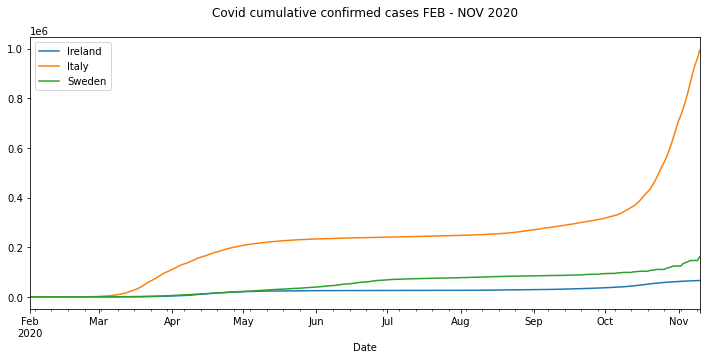

In [12]:
#Overview of cumulative confirmed cases
ax = full_df.loc['Ireland'].plot(y='Confirmed',figsize=(12,5))
full_df.loc['Italy'].plot(ax=ax,y='Confirmed')
full_df.loc['Sweden'].plot(ax=ax,y='Confirmed')
L=plt.legend()
L.get_texts()[0].set_text("Ireland")
L.get_texts()[1].set_text("Italy")
L.get_texts()[2].set_text("Sweden")
plt.title("Covid cumulative confirmed cases FEB - NOV 2020\n")
plt.show()

This gives us an initial feel to the data we are dealing with. Above we can see how Italy has by far the most confirmed cumulative cases. Sweden and Ireland start off on the same level up until mid May when the effect of the Irish Lockdown can be seen as new cases stablise while Sweden keeps growing.

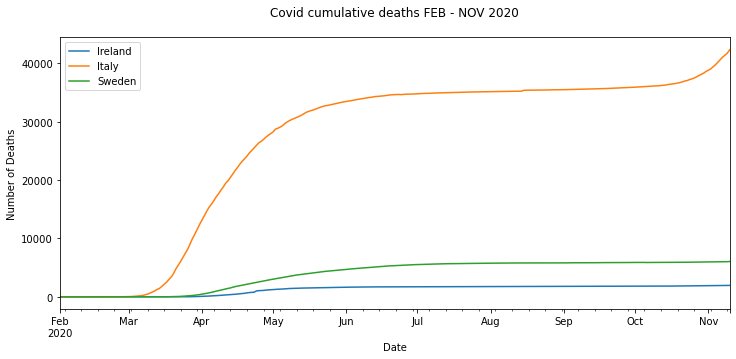

In [13]:
#Overview of cumulative deaths
ax = full_df.loc['Ireland'].plot(y='Deaths',figsize=(12,5))
full_df.loc['Italy'].plot(ax=ax,y='Deaths')
full_df.loc['Sweden'].plot(ax=ax,y='Deaths')
L=plt.legend()
L.get_texts()[0].set_text("Ireland")
L.get_texts()[1].set_text("Italy")
L.get_texts()[2].set_text("Sweden")
plt.title("Covid cumulative deaths FEB - NOV 2020\n")
ax.set_ylabel("Number of Deaths")
plt.show()

Once again we can see how Italy has by far the most cumulative deaths with a steep rise between mid-March until June reaching nearly 35,000 deaths which then stabilises post-lockdown. Sweden is again in second place and finally Ireland with the latter two countries following a very similar trend.

Even though the above graphs are extremely informative, they are not very useful for neither detailed country analysis as it doesn't have new daily numbers or for comparative analysis as the populations of these countries vary drastically.

**<font color= orange> Country Analysis: </font>**

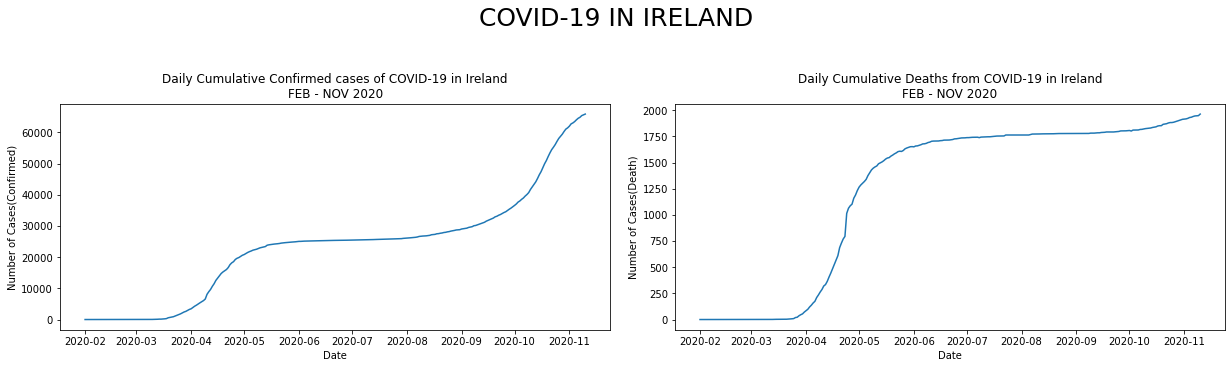

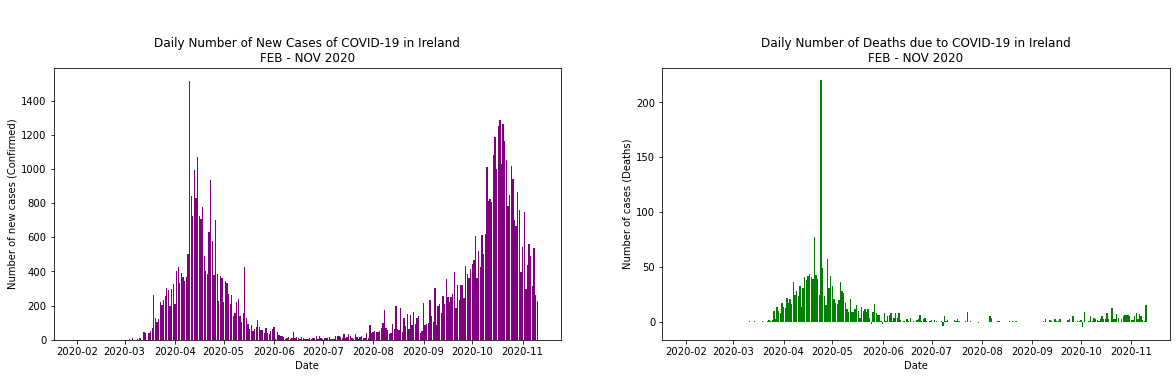

In [14]:
#GRAPHING DATA FOR IRELAND
#Create line graphs for cumulative cases and deaths
fig, axs = plt.subplots(1,2, figsize=(17,5),constrained_layout=True)
x = full_df.loc['Ireland']['Confirmed']
y = full_df.loc['Ireland']['Deaths']
fig.suptitle('COVID-19 IN IRELAND', fontsize=25)
axs[0].title.set_text('Daily Cumulative Confirmed cases of COVID-19 in Ireland\nFEB - NOV 2020')
axs[1].title.set_text('\n\nDaily Cumulative Deaths from COVID-19 in Ireland\nFEB - NOV 2020')
axs[0].set_xlabel('Date') 
axs[1].set_xlabel('Date')
axs[0].set_ylabel('Number of Cases(Confirmed)')
axs[1].set_ylabel('Number of Cases(Death)')
axs[0].plot(x) 
axs[1].plot(y)

#Create bar graphs for daily cases and deaths
fig, ax = plt.subplots(1,2,figsize=(20, 5))
ax[0].bar(full_df.loc['Ireland'].index,full_df.loc['Ireland']['New Confirmed'],color='purple')
ax[0].set(xlabel="Date",ylabel="Number of new cases (Confirmed)",title="Daily Number of New Cases of COVID-19 in Ireland\nFEB - NOV 2020")
ax[1].bar(full_df.loc['Ireland'].index,full_df.loc['Ireland']['New Deaths'],color='green')
ax[1].set(xlabel="Date",ylabel="Number of cases (Deaths)",title="\n\nDaily Number of Deaths due to COVID-19 in Ireland\nFEB - NOV 2020")
plt.show()

***Above is a detailed subplot showing the stats for Ireland.***    

**Cumulative cases confirmed VS time:** We can see how Ireland had two periods of steep increase in cases confirmed. Firstly between April and June with confirmed cases rising up to around 28,000, then came a plateau (shoulder region) which signifies low number of new cases, then between September and Novemeber we see another steep rise in cases up to over 60,000 cases showing the second wave of the virus.   
**New cases confirmed VS time:** This graph reinforces the first one. It tells us the same information using different data and visualisation. It shows us the number of new cases per day. We see a huge spike in numbers in April (reaching 1500 new cases in a day) which signifies the first wave of the virus in Ireland. Then the nationwide lockdown happened, the fruits of it can be seen in the middle region of the graph with cases below 100 per day. <font color= blue>*However, the lockdown was lifted and people thought they can return to normal behaviour which resulted in a second wave in October which is nearly identical in numbers of new cases to the first one.*</font>  
**Cumulative deaths VS time:** The number of deaths started a steep increase just after the steep rise in the number of new cases in the first wave in April, this continued till the end of the first wave in June reaching nearly 1750 deaths. <font color= blue>*Surprisingly the graph seems to have stabilised in a plateau region with minor new deaths. The second wave of new cases had little impact on the number of deaths meaning the second wave had much less deaths.*</font>   
**New deaths VS time:** Once again this graphs reinforces what the previous graph informed us. There is a major spike in the number of daily deaths that corresponds with the first wave of confirmed cases between April and June reach a daily deaths peak of over 200 deaths in a single day. As we move to the right of the spike in the graph we see stability with no new major spikes showing how the second wave did not correspond to many deaths like the first one. 

> **<font color= orange> Note: </font>**  
>- It is worth noting that some days had a negative number of daily deaths reported, this may seem bizarre at first as if people are coming back to life. Where in fact it is due to data being quickly relayed to the public, without being properly quality controlled. A few days later when it is finally carefully checked, numbers can change. It can be because a patient was reported by multiple sources and counted multiple times without being properly deduplicated etc. Now that the wave is slowly receding, data is being consolidated and that can result in absurdities like daily "negative deaths".

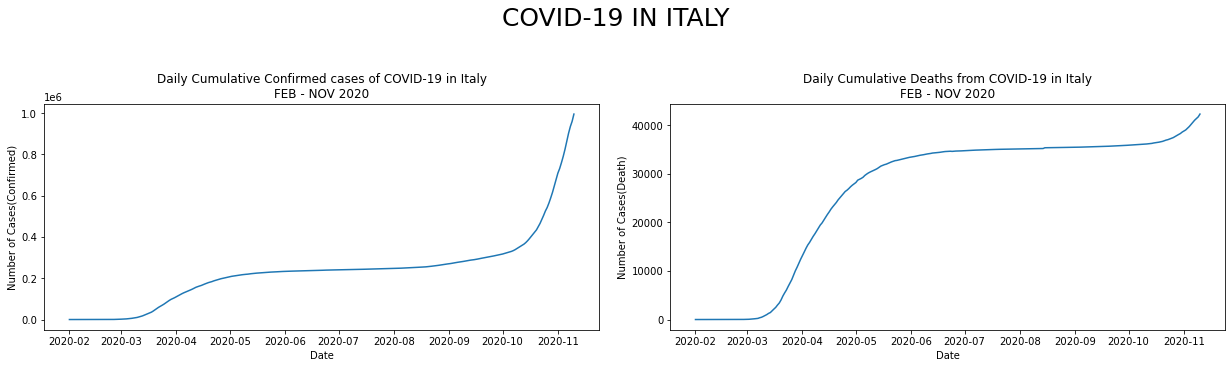

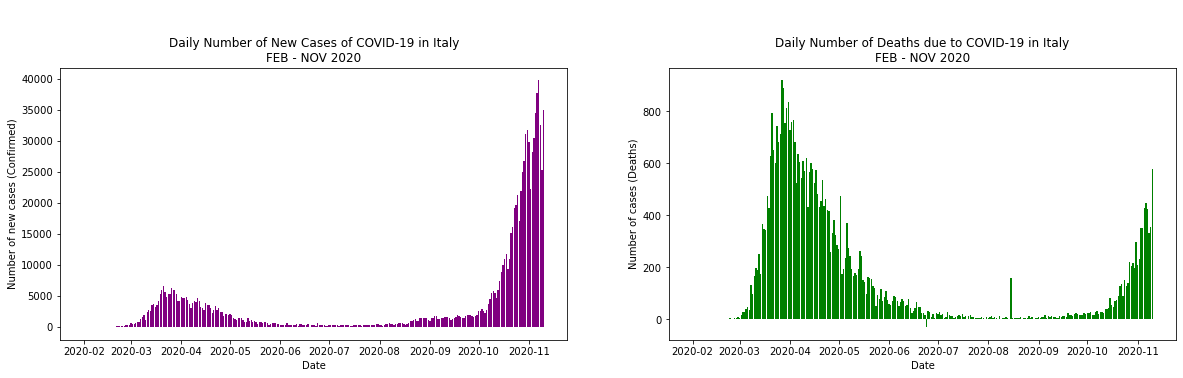

In [15]:
#GRAPHING DATA FOR ITALY
#Create line graphs for cumulative cases and deaths
fig, axs = plt.subplots(1,2, figsize=(17,5),constrained_layout=True)
x = full_df.loc['Italy']['Confirmed']
y = full_df.loc['Italy']['Deaths']
fig.suptitle('COVID-19 IN ITALY', fontsize=25)
axs[0].title.set_text('Daily Cumulative Confirmed cases of COVID-19 in Italy\nFEB - NOV 2020')
axs[1].title.set_text('\n\nDaily Cumulative Deaths from COVID-19 in Italy\nFEB - NOV 2020')
axs[0].set_xlabel('Date') 
axs[1].set_xlabel('Date')
axs[0].set_ylabel('Number of Cases(Confirmed)')
axs[1].set_ylabel('Number of Cases(Death)')
axs[0].plot(x) 
axs[1].plot(y)

#Create bar graphs for daily cases and deaths
fig, ax = plt.subplots(1,2,figsize=(20, 5))
ax[0].bar(full_df.loc['Italy'].index,full_df.loc['Italy']['New Confirmed'],color='purple')
ax[0].set(xlabel="Date",ylabel="Number of new cases (Confirmed)",title="Daily Number of New Cases of COVID-19 in Italy\nFEB - NOV 2020")
ax[1].bar(full_df.loc['Italy'].index,full_df.loc['Italy']['New Deaths'],color='green')
ax[1].set(xlabel="Date",ylabel="Number of cases (Deaths)",title="\n\nDaily Number of Deaths due to COVID-19 in Italy\nFEB - NOV 2020")
plt.show()

***Above is a detailed subplot showing the stats for Italy.***    

**Cumulative cases confirmed VS time:** Just like Ireland, Italy had two periods/waves of steep increase in cases confirmed. Italy started a couple of weeks earlier in both times at mid-March and start of October. In between these two inclines we find a shoulder region of stability signifiying a low new number of cases as a result of the strict lockdown in Italy.  
**New cases confirmed VS time:** Reinforcing the first graph, this one shows us the number of new cases per day. We see a huge spike in numbers in April (reaching just under 10,000 new cases in a day) which signifies the first wave of the virus. Then the nationwide lockdown happened, the fruits of it can be seen in the middle region of the graph with cases below 1000 per day. However, the lockdown was lifted resulting in a second wave in October <font color= blue>*however it is much larger and more widespread than the first one with daily new cases reaching new heights at nearly 40,000 new confirmed per day.*</font>    
**Cumulative deaths VS time:** The number of deaths started a steep increase about two weeks after the steep rise in the number of new cases in the first wave in March, this continued till the end of the first wave in June reaching nearly 35,000 deaths. There seems to be a new steep rise in the number of deaths happening now after the plateau region.  
**New deaths VS time:** Once again this graphs reinforces what the previous graph informed us and adds more. There is a major spike in the number of daily deaths that corresponds with the first wave of confirmed cases between April and June reach a daily deaths peak of over 900 deaths in a single day. <font color= blue>*The new information it shows us is that there most definitly is a new spike in deaths happening as we see new peaks in daily deaths nearly reaching 600 a day. This seems to be headed to similar numbers of deaths as the first wave which is opposite to Ireland.*</font> This could be due to Italy having 22% of its population above 65 compared to Ireland's 14%.

>**<font color= orange> Note: </font>**
>- Same comment regarding negative values apply as for Ireland.
>- Another interesting thing that we can see in the daily deaths chart is that on just a single day in August in the middle of very low death numbers, there is a day that has nearly 200 deaths. There are many reasons why this could be but most likely due to a backlog in testing from the first wave.

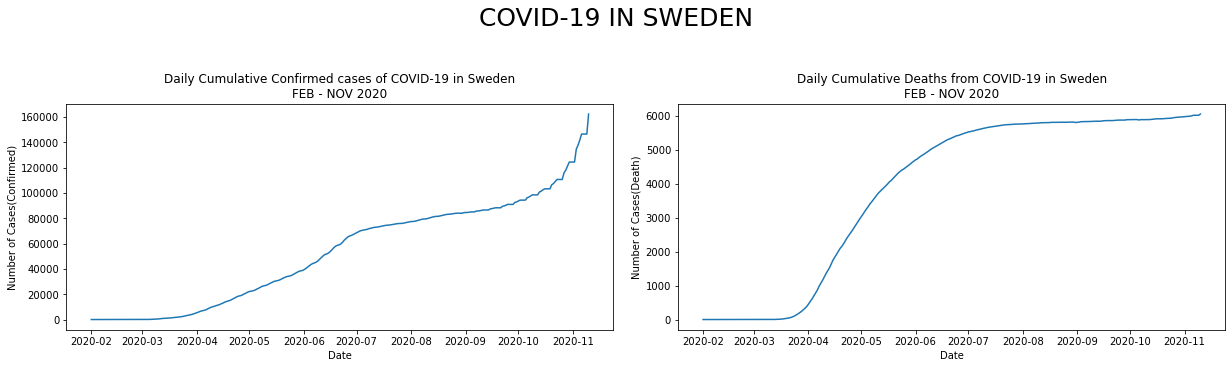

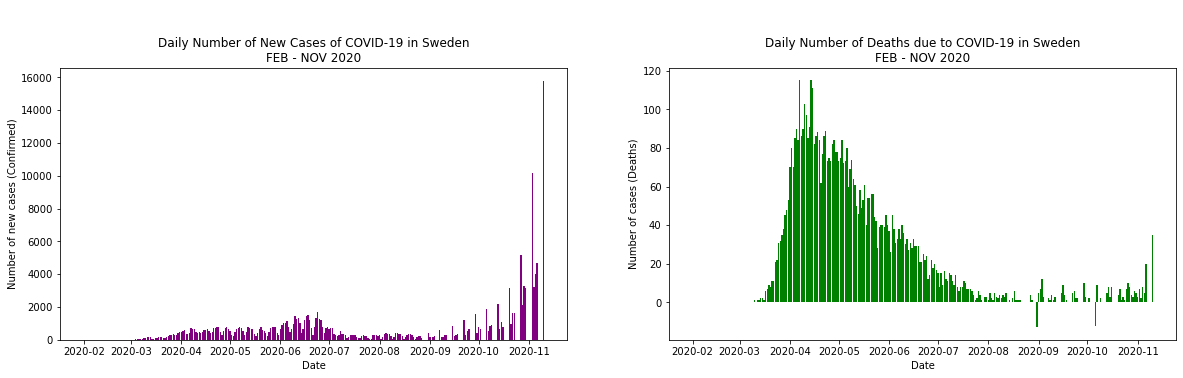

In [16]:
#GRAPHING DATA FOR SWEDEN
#Create line graphs for cumulative cases and deaths
fig, axs = plt.subplots(1,2, figsize=(17,5),constrained_layout=True)
x = full_df.loc['Sweden']['Confirmed']
y = full_df.loc['Sweden']['Deaths']
fig.suptitle('COVID-19 IN SWEDEN', fontsize=25)
axs[0].title.set_text('Daily Cumulative Confirmed cases of COVID-19 in Sweden\nFEB - NOV 2020')
axs[1].title.set_text('\n\nDaily Cumulative Deaths from COVID-19 in Sweden\nFEB - NOV 2020')
axs[0].set_xlabel('Date') 
axs[1].set_xlabel('Date')
axs[0].set_ylabel('Number of Cases(Confirmed)')
axs[1].set_ylabel('Number of Cases(Death)')
axs[0].plot(x) 
axs[1].plot(y)

#Create bar graphs for daily cases and deaths
fig, ax = plt.subplots(1,2,figsize=(20, 5))
ax[0].bar(full_df.loc['Sweden'].index,full_df.loc['Sweden']['New Confirmed'],color='purple')
ax[0].set(xlabel="Date",ylabel="Number of new cases (Confirmed)",title="Daily Number of New Cases of COVID-19 in Sweden\nFEB - NOV 2020")
ax[1].bar(full_df.loc['Sweden'].index,full_df.loc['Sweden']['New Deaths'],color='green')
ax[1].set(xlabel="Date",ylabel="Number of cases (Deaths)",title="\n\nDaily Number of Deaths due to COVID-19 in Sweden\nFEB - NOV 2020")
plt.show()

***Above is a detailed subplot showing the stats for Sweden.***    

**Cumulative cases confirmed VS time:** Unlike Ireland and Italy, Sweden had a relatively steady/smooth increase in the number of cases from April up to July with a way less steeper line. Sweden reached 80,000 cases in July and experienced a quite stable period till October when the line <font color= blue>*took a steep turn upwards signifying a very dangerous wave which is yet to end, currently peaking at over 160,000 confirmed cases.*</font> Sweden had no official lockdowns and depended on its people's sense of responsibility.  
**New cases confirmed VS time:** Reinforcing the first graph, this one shows us the number of new cases per day. We see a stable number of daily cases of aorund 2000 upp till July. Then we see a decrease in the number of daily cases till September. <font color= blue>*The number of daily cases starts shooting up hitting new peaks nealry daily from September and is yet to stop reaching daily heights of nearly 16,000 new cases.*</font>  
**Cumulative deaths VS time:** The number of deaths started a steep increase with the initial new cases in the country between March and July, the number of deaths cumulated up to 5,500 <font color= blue>*which was increasing at a faster rate than the new cases unlike the other two countries. The graph then reached a plateau region up to the end meaning there are very few deaths despite the new wave of confirmed cases.*</font>  
**New deaths VS time:** Once again this graphs reinforces what the previous graph informed us and adds more. There is a major spike in the number of daily deaths that corresponds with the  steep rise is cumulative deaths in the previous graph between March and July, reaching a daily deaths peak of over 115 deaths. There seems to be a nice maximum being worked towards in regards to daily deaths as the daily numbers are increasing rapidly in Novemeber in correspondance to the new huge wave of confirmed daily cases.

> **<font color= orange> Note: </font>**  
>- Same comment regarding negative values apply as for Ireland and Italy.
>- The virus seems more deadly in Sweden than the other two countries by comparing the number of deaths to the number of new cases.
>- A new huge wave of deaths will probably strike within a week once the effects of the huge spike of new confirmed cases is felt.

**<font color= orange> Comparative Analysis: </font>**
#### In the next section we will compare the countries using the daily percentages for cases confirmed and deaths
The way the percentages were calculated has been discussed when they were feature engineered earlier in the notebook.
So what can we say about them?
>- The cases from different countries are now normalized. Each country has the same maximum at 100%.
>- The percentage of cases/deaths of each country are against its own maximum at 100%.
>- We could compare at any date the “status” of each country against others, of course only in percentage.
>- We could explore the breakout date of each country, where graphs reached a maximum of 100%.

*First of all we must show that these percentages calculated do actually correspond to the actual numbers of cases reported*

<Figure size 432x288 with 0 Axes>

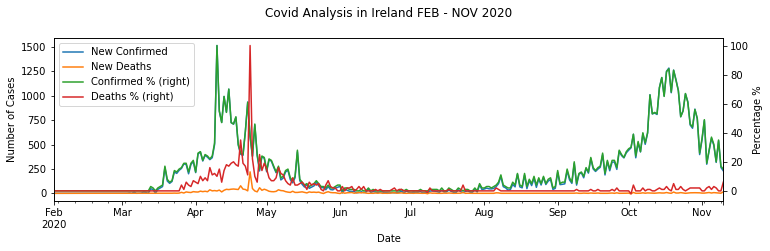

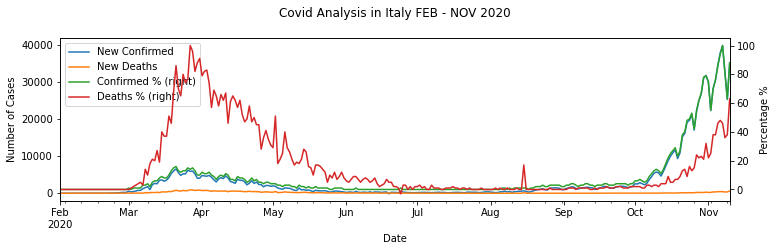

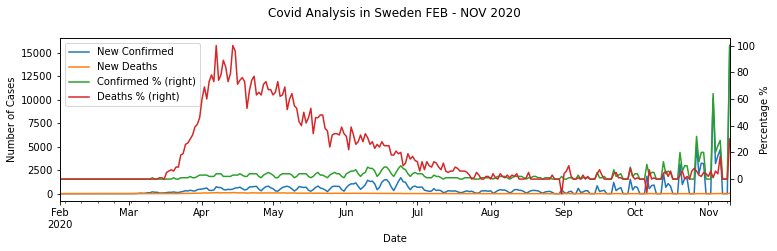

In [17]:
#Comparing the percentages with the actual numbers via dual y-axis graph trends
#Ireland
plt.figure()
ax = full_df.loc['Ireland'][['New Confirmed','New Deaths','Confirmed %','Deaths %']].plot(secondary_y=['Confirmed %','Deaths %'],figsize=(12,3))
ax.set_ylabel("Number of Cases")
ax.right_ax.set_ylabel("Percentage %")
plt.title("Covid Analysis in Ireland FEB - NOV 2020\n")
plt.xlabel("Date")
plt.show()
#Italy
ax = full_df.loc['Italy'][['New Confirmed','New Deaths','Confirmed %','Deaths %']].plot(secondary_y=['Confirmed %','Deaths %'],figsize=(12,3))
ax.set_ylabel("Number of Cases")
ax.right_ax.set_ylabel("Percentage %")
plt.title("Covid Analysis in Italy FEB - NOV 2020\n")
plt.show()
#Sweden
ax = full_df.loc['Sweden'][['New Confirmed','New Deaths','Confirmed %','Deaths %']].plot(secondary_y=['Confirmed %','Deaths %'],figsize=(12,3))
ax.set_ylabel("Number of Cases")
ax.right_ax.set_ylabel("Percentage %")
plt.title("Covid Analysis in Sweden FEB - NOV 2020\n")
plt.show()

**Analysis**
>- We can clearly see how New Confirmed (Blue) and Confimed % (Green) follow the same trend in all the countries. In fact in the case of Ireland you can barely see the blue line behind the green. This shows how well the standardisation technique used is as it mimics the excat same pattern of the actual new cases confirmed, thus allowing us to compare the countries with different populations accurately.

**Confirmed Cases Wave Analysis (Green/Blue lines):**
>- We can also clearly see what we analysed in the previous section, Ireland has two waves of the same size in terms of daily confirmed cases. Italy's first wave was much smaller than the current wave they are experiencing now in Novemeber which is nearly 4 times as large. In Sweden it was a gradual increase with the first real wave happening now in November.

**What about deaths?**
>- This is also the case with the New Deaths(yellow) and Deaths % (red) in all the countries. This is not obvious in the plots above due to the high number of confirmed cases opposed to the number of deaths. However the trends match perfectly allowing us to use Deaths % as a means of comparison between countries. The next set of graphs proof this.

<Figure size 432x288 with 0 Axes>

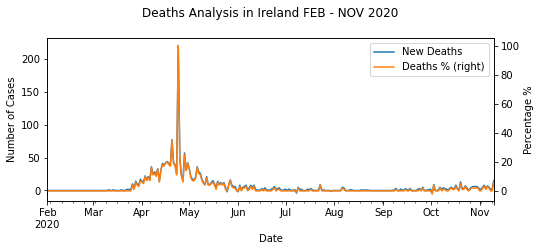

<Figure size 432x288 with 0 Axes>

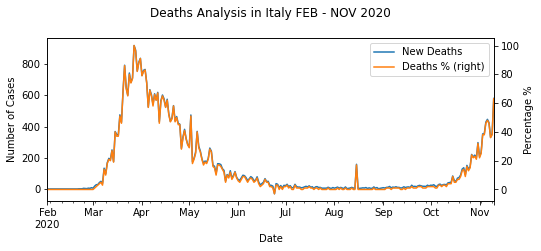

<Figure size 432x288 with 0 Axes>

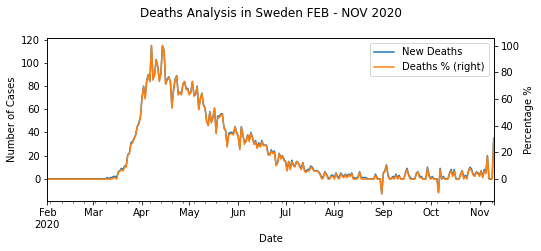

In [18]:
#DEATHS TRENDS
#Ireland
plt.figure()
ax = full_df.loc['Ireland'][['New Deaths','Deaths %']].plot(secondary_y=['Deaths %'],figsize=(8,3))
ax.set_ylabel("Number of Cases")
ax.right_ax.set_ylabel("Percentage %")
plt.title("Deaths Analysis in Ireland FEB - NOV 2020\n")
plt.xlabel("Date")
plt.show()
#Italy
plt.figure()
ax2 = full_df.loc['Italy'][['New Deaths','Deaths %']].plot(secondary_y=['Deaths %'],figsize=(8,3))
ax2.set_ylabel("Number of Cases")
ax2.right_ax.set_ylabel("Percentage %")
plt.title("Deaths Analysis in Italy FEB - NOV 2020\n")
plt.xlabel("Date")
plt.show()
#Sweden
plt.figure()
ax2 = full_df.loc['Sweden'][['New Deaths','Deaths %']].plot(secondary_y=['Deaths %'],figsize=(8,3))
ax2.set_ylabel("Number of Cases")
ax2.right_ax.set_ylabel("Percentage %")
plt.title("Deaths Analysis in Sweden FEB - NOV 2020\n")
plt.xlabel("Date")
plt.show()

**Analysis**
>- In these graphs we take out the Confirmed cases statistics and only use the Deaths statistics. Now that the values adjusted proportionally we can clearly see what was said before, that each country's Death % follows the exact same trend as its new deaths per day showing the accuracy of the normalisation.

**Deaths Wave Analysis:**
>- Its clear that Ireland experienced a single wave of high deaths around April/May. In Italy there also was a huge and longer wave of deaths from March till June and the trend suggests a repeat of that happening currently in Novemeber with number of deaths shooting up. Finally in Sweden there was a huge wave of  deaths that was very similar to Italy's but there is yet to be a sign of a second wave.

**<font color= orange> Percentages Analysis: </font>**
*Now that we proved the accuracy of the normalisation conducted we can use Confirmed % and Deaths % alone to compare the perfomance of countries at different times and hypothise the reasons for such perfomances.*

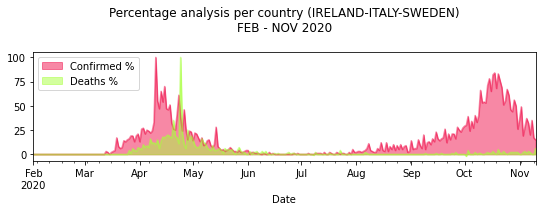

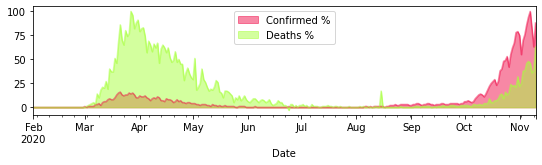

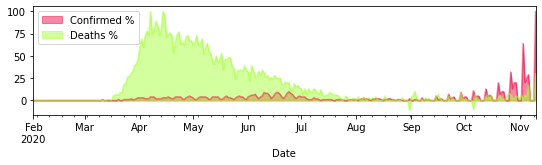

In [19]:
#Quick Summary of percentage analysis
full_df.loc['Ireland'].drop(['Confirmed','Deaths','New Confirmed','New Deaths'], axis=1).plot.area(figsize=(9,2), stacked=False, color=['#f0134d', '#A8FF3E','#5edfff',] , label = ['Change rate', 'year'])
plt.title("Percentage analysis per country (IRELAND-ITALY-SWEDEN)\nFEB - NOV 2020\n")
full_df.loc['Italy'].drop(['Confirmed','Deaths','New Confirmed','New Deaths'], axis=1).plot.area(figsize=(9,2), stacked=False, color=['#f0134d', '#A8FF3E','#5edfff',] , label = ['Change rate', 'year'])
full_df.loc['Sweden'].drop(['Confirmed','Deaths','New Confirmed','New Deaths'], axis=1).plot.area(figsize=(9,2), stacked=False, color=['#f0134d', '#A8FF3E','#5edfff',] , label = ['Change rate', 'year'])
plt.show()

The above gives a quick country wise overview percentage analysis, we tell the following:
- Ireland had a death peak after the first confirmed cases peak but did not after the second confirmed cases peak.
- Italy's death peak was during its smaller outbreak in April but it also had another death outbreak during its larger outbreak in October.
- Sweden had its death peak without a confirmed cases outbreak in April. The deaths are slowly peaking again with the new confirmed cases peak in November.

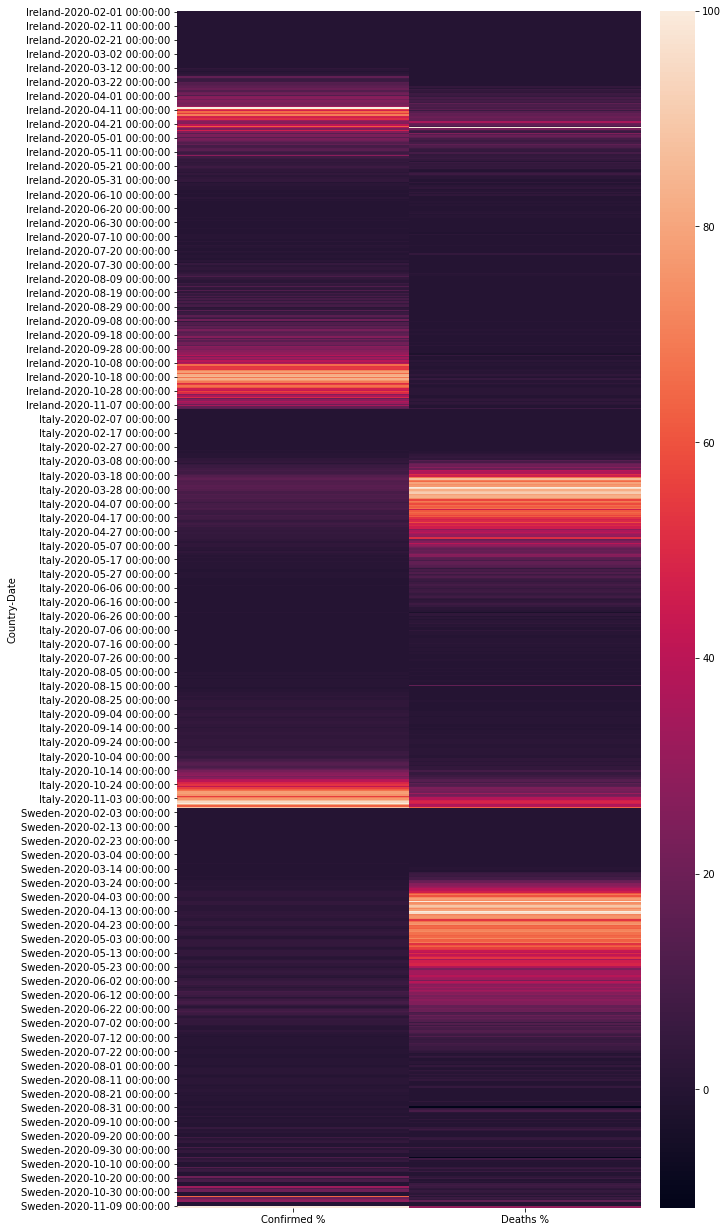

In [20]:
#COUNTRIES COMPARISION
fig, ax = plt.subplots(figsize=(10,17),constrained_layout=True)
ax = sns.heatmap(full_df[['Confirmed %', 'Deaths %']])

Heat map allowing us to compare the growth of numbers:
>- Above is a heat map showing updates for each country from Febraury until Novemeber in intervals of approximately 9 days. There are two columns one for Confirmed% and one for Deaths%. The higher the percentage (cases) the lighter the colour and vice versa. The colour of the stips allows us to distinguish a sudden rise (no gradient) in numbers or a consistent build up of numbers (lights up slowly).

>- We can see that Ireland's first wave was much more sudden compared to the second one which had a smooth colour transition to light. Italy's first wave can't be seen on the heatmap due to the second wave being much larger this Italy's column is light at the end with a relatively smooth colour transition similar to Ireland's second one. Sweden seems to be controlling the virus well with hardly any light colours except towards the end.

>- In terms of the Deaths % column we see that Ireland has a sudden, non-smooth transition into a light stripe in May signifying the spike in deaths. Italy's highest has a smooth transition into its peak for deaths in April during its first wave of the virus while the second, much larger, wave of cases confirmed did not affect the deaths % column. Sweden, similar to Italy, has a smooth transition to its deaths peak in April even though that does not correspond to the highest confirmed cases peak.

**<font color= orange> Trends Analysis: </font>** *Now compare the trends of each countries confirmed cases and deaths on a standardised axis and compare and contrast the countries strategies in handling the virus*

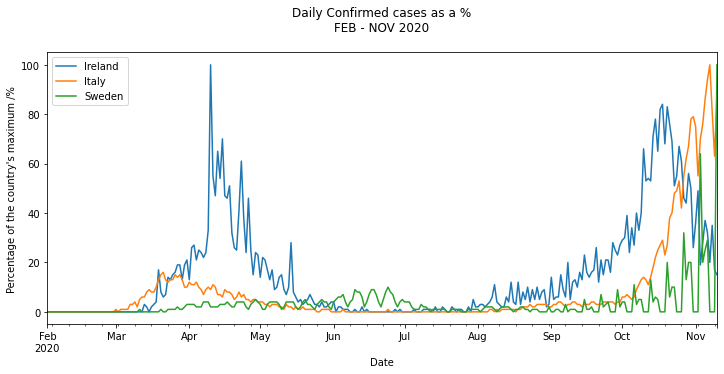

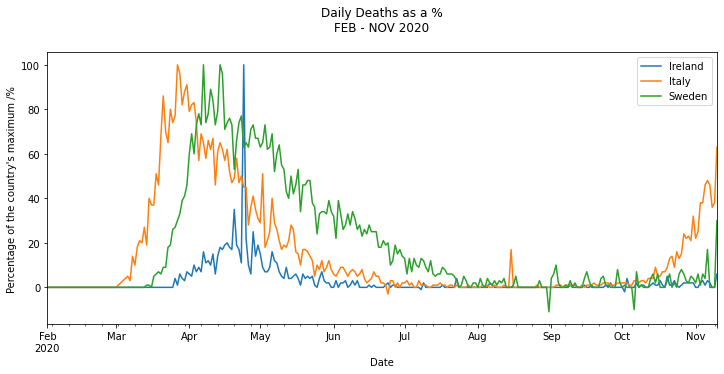

In [21]:
#Graph on the same graph and axis each countries confirmed % 
ax = full_df.loc['Ireland'].plot(y='Confirmed %', figsize=(12,5))
full_df.loc['Italy'].plot(ax=ax,y='Confirmed %')
full_df.loc['Sweden'].plot(ax=ax,y='Confirmed %')
L=plt.legend()
L.get_texts()[0].set_text("Ireland")
L.get_texts()[1].set_text("Italy")
L.get_texts()[2].set_text("Sweden")
ax.set_ylabel("Percentage of the country's maximum /%")
plt.title("Daily Confirmed cases as a %\nFEB - NOV 2020\n")
plt.show()
#Graph on the same graph and axis each countries deaths % 
ax = full_df.loc['Ireland'].plot(y='Deaths %', figsize=(12,5))
full_df.loc['Italy'].plot(ax=ax,y='Deaths %')
full_df.loc['Sweden'].plot(ax=ax,y='Deaths %')
L=plt.legend()
L.get_texts()[0].set_text("Ireland")
L.get_texts()[1].set_text("Italy")
L.get_texts()[2].set_text("Sweden")
ax.set_ylabel("Percentage of the country's maximum /%")
plt.title("Daily Deaths as a %\nFEB - NOV 2020\n")
plt.show()

**Daily Confirmed Graph Analysis**
>- IRELAND: Ireland hits 100% in April, on a steep incline(quickly),showing us the first breakout of the virus in the country. The government imposed a lockdown which led the number of new cases to slowly drop in the summer. The restrictions were eased and the people slowly started going out more and more causing a slow increase of the numbers starting in September. The country nearly reached a new peak at over 80%, but the government intervened and imposed a new lockdown in October leading to the numbers slowly dropping just like after the first spike.
***Ireland's First and Second waves are very similar in terms of number of cases**

>- ITALY: The country had a spike in March, which back then was considered huge. A strict lockdown followed causing the cases to drop slowly as summer was approached. The summer was a period with verty low cases under 5%. The lockdown was eased in May but the effects of this easing only started beung felt in October with a very quick sharp rise in the number of cases, nearly 4 times that of the first wave. Italy recently announced new restrictions hopping to bring the numbers down like in the first lockdown.
***Italy's Second wave is 4 times worse than the first one in terms of number of cases**

>- SWEDEN: The country that did not have a lockdown did not have a spike in cases from March up until October. It had periods of fluctuating number but no peak. The Swedish government counted on its citizen's responsibily and it seemed to pay off. Unfortunately Sweden seems to be facing its first wave of the virus reaching the 100% mark in Novemeber. This does not seem to be going down.
***Beginning of the first breakout in Sweden because graphs reached its maximum of 100% in last few days**

>- OVERALL: First spike (March to May) | Plateau of very few cases in the summer | New explosion of cases causing a second spike (September/October)

**Deaths Graph Analysis**
>- IRELAND: Huge spike of deaths peaking in April corresponding to the first peak in cases confirmed. Very low deaths since then even through the second peak in cases confirmed.
***The first wave was much deadlier than the first wave even though the number of cases was the same**

>- ITALY: Huge spike of deaths peaking in March corresponding to the first peak in cases confirmed. Very low deaths throughout the summer but it started a crawl towards the peak again in October with the second much larger wave of cases.
***The first and second waves seem to have caused the same amount of deaths so far even though the second wave has quadruple the amount of cases**

>- SWEDEN: Huge spike of deaths peaking in April. Very low deaths throughout the summer but it started to rise again in November with the first large wave of cases.
***There seems to be much more Deaths in April than now even though there was much less cases confirmed then.**

>- OVERALL: All countries peaked (100%) in March/April in terms of deaths regardless of the number of cases confirmed | Some countries had another peak in deaths with the new waves while other did not. For example Ireland did not have another deaths peak while Italy did, this is likely because 22% of Italy's population is above 65 while its 14% in Ireland.

# Task 2d : Summarising Insights

**<font color= blue> Summarising insights: </font>**  

**<font color= red>1) Lockdowns</font>**
>- Fistly we  can see how Lockdowns were introduced twice in Ireland and Italy when the cases confirmed peaked (first and second wave). The effect of those lockdowns can be felt immediately as the number of cases slowly drops thanks to them. This worked every time. 
>- On the other hand, Sweden did not have a lockdown up until November and did not suffer from outbreaks, therefore people may argue lockdowns are not effective. In this case one must understand that the Swedish government counted on the responsibility of its citizens who self isolated when needed. The Swedish people did a great job with self control thus curbing the virus until November. Unfortunately the virus exploded in November causing the Swedish government to finally put in place restrictions.

>**Therefore we can conclude that lockdowns are effective in stopping the transmission of the virus.**

**<font color= red>2) First vs Second wave</font>**
>- In all the countries the wave around October (second wave) is the same size if not larger than the first wave around March. This could be due to "Restriction Fatigue" with people having a sense of regained freedom and a feeling of lesser need to adhere to physical distancing measures over the summer months. It could also be linked to schools re-opening in September in most countries.
>- In all the countries the number of deaths around March (first  wave) is a much larger in proportion with the cases confirmed than the number of deaths in the second wave in October. There are many possible reasons for this, one could be because the treatments are getting better as we got to learn more about the virus. Another reason is most of the infected in the October wave are young people which are more likely to recover, this is because the older people are much more careful after the deadly March wave. Finally the data could have been inaccurate in the first wave with people being reported as COVID-19 deaths when they have actually died of other reasons.

>**Therefore the October wave was larger in numbers of cases confirmed, but the March wave was more deadly.**

**<font color= red>3) Season</font>**
>- Many news came out at the start of the pandemic claiming that it will "die off" with hot and humid weather in the summer. Some may look at the data and argue that it did. This is because we see a plateau region (global minimum) in the summer with very little new cases and new deaths in the three countries while the other months are associated with breakouts.
>- However this data, even though it may seem to support the seasonality argument, it actually does not as there are many other factors. For example Ireland and Italy both imposed very strict lockdowns just before the summer therefore the virus was curbed for the summer. This is expected to happen again after the new lockdowns causing a new global minimum in December 2020 thus proving the argument that the summer stops the spread of COVID-19 wrong.

>**This data does not proof that COVID-19 is less viral or deadly in the summer.**

**<font color= red>PREDECTIONS</font>**
>- Ireland is likely to curb the virus as it the lines are tending downwards thanks to its second lockdown. Another summer-like period is expected around Christmas with low numbers.
>- Italy has also imposed a new lockdown, however the trends still seem to go up. Therefore its likely that the number of deaths and cases peak in the coming week and then slowly drop down to summer levels reaching a plateau around Christmas like Ireland.
>- Sweden has imposed a lockdown just last week, unfortunately the rate the virus is spreading is extremely high therefore it will probably peak in a couple of weeks and then the effects of lockdown will be felt with numbers falling.

**<font color= blue> Future Analysis: </font>**
>- In future analysis, take into account number of tests conducted when standardising the data. This may have a huge effect as many countries may seem to be dealing with the virus very well on the surface but that is actually because they do not conduct enough tests. This may have been the case in Sweden as the receny surge in number of cases has been linked with a surge in testing numbers.
>- Future analysis could include using the available data to predict what future trends will look and thus government and citizens can take the appropriate measures. Predicitve analysis and extrapolation can be employed and certain risk measures can be fed into the model.
>- It would also be interesting to analyse the relationship via conducting regression between the COVID-19 data and data around mental health, countries GDP and the effect it has on imports/exports of a country.